In [52]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
wine_dataset = pd.read_csv("wine_dataset.csv")
ufc_dataset = pd.read_csv("ufc_data.csv")
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

ufcX = ufc_dataset.drop("Winner", 1).copy().values
ufcY = ufc_dataset["Winner"].copy().values
ufc_x_df = ufc_dataset.drop("Winner",1)

wineX = wine_dataset.drop("class", 1).copy().values
wineY = wine_dataset["class"].copy().values
wine_x_df = wine_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
ufcX = min_max_scaler.fit_transform(ufcX)
ufcX_df = pd.DataFrame(ufcX, columns=ufc_x_df.columns)
wineX = min_max_scaler.fit_transform(wineX)
wineX_df = pd.DataFrame(wineX, columns=wine_x_df.columns)

In [8]:
ufcX.shape
dims_ufc = list(range(2,150,1))

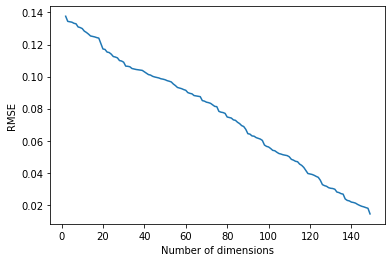

In [53]:
rc_errors = {}
for dim in dims_ufc:
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(ufcX_df.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(ufcX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.show()

In [69]:
comp = 40
grp = GaussianRandomProjection(n_components=comp, random_state=44)
grp_result = grp.fit_transform(ufcX_df.values)
for i in range(comp):
    field_name = "grp-"+str(i)
    ufcX_df[field_name] = grp_result[:,i]
    ufc_dataset[field_name] = grp_result[:,i]
ufcX_grp_40 = grp_result

In [59]:
ufcX_df.head()

,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,grp-30,grp-31,grp-32,grp-33,grp-34,grp-35,grp-36,grp-37,grp-38,grp-39
0,1.0,0.0,0.333333,0.187755,0.153846,0.002299,0.000000,0.230996,0.158462,0.029545,...,0.495685,0.447574,-0.509854,0.343594,0.164113,-0.190553,-0.389247,0.098851,-0.379780,0.940379
1,1.0,0.0,0.250000,0.297959,0.233333,0.135632,0.107353,0.460148,0.323846,0.027273,...,0.677525,0.390540,-0.848316,0.370295,-0.209958,-0.183859,-0.571965,-0.467169,0.102339,0.984703
2,0.0,0.0,0.250000,0.313364,0.290323,0.077494,0.064516,0.312701,0.296774,0.062683,...,0.230588,0.388793,-0.725148,0.800119,-0.042485,-0.511966,-0.711594,-0.567176,-0.143515,0.617629
3,0.0,0.0,0.333333,0.346939,0.358974,0.158046,0.161765,0.404059,0.375000,0.147727,...,0.641775,0.466112,-0.846821,0.561776,0.369599,-0.566446,-0.497872,0.454809,0.231469,0.519477
4,0.0,0.0,0.083333,0.346939,0.371795,0.028736,0.029412,0.741697,0.457692,0.000000,...,0.433048,-0.274796,-0.303885,-0.436417,-0.095682,-0.579802,-0.803924,-0.225149,0.305699,1.398567


In [60]:
rndperm = np.random.permutation(ufc_dataset.shape[0])


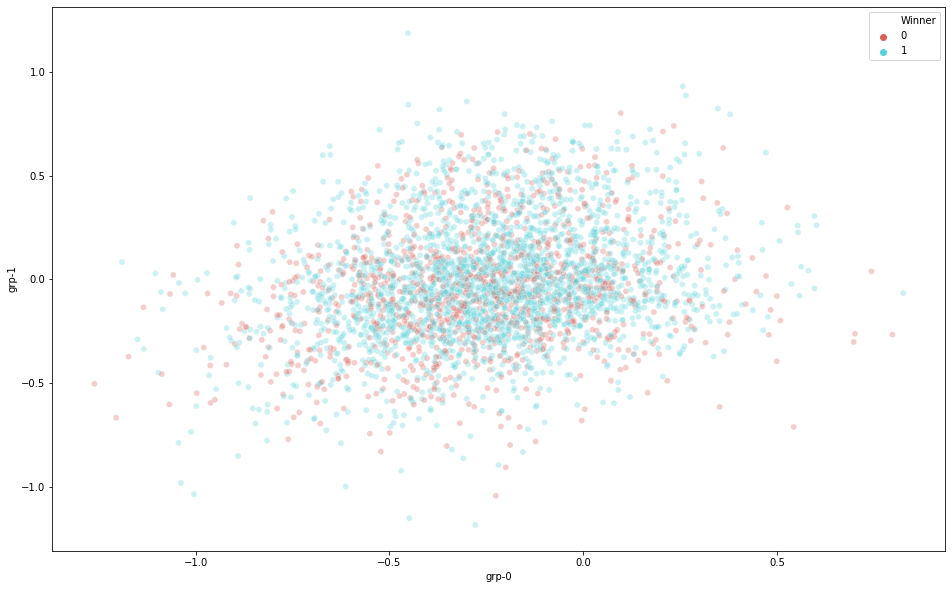

In [61]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="grp-0", y="grp-1",
    hue="Winner",
    palette=sns.color_palette("hls", 2),
    data=ufc_dataset,
    legend="full",
    alpha=0.3
)

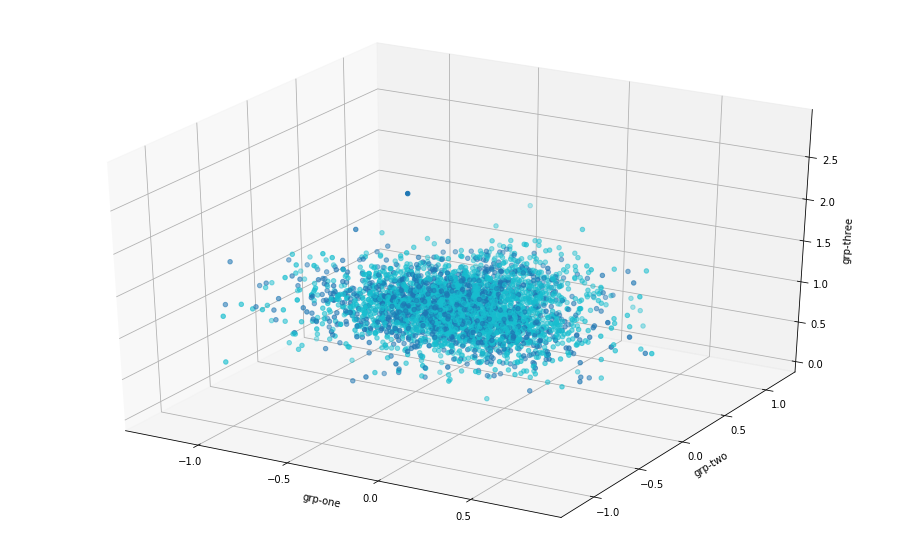

In [62]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=ufc_dataset.loc[rndperm,:]["grp-0"], 
    ys=ufc_dataset.loc[rndperm,:]["grp-1"], 
    zs=ufc_dataset.loc[rndperm,:]["grp-2"], 
    c=ufc_dataset.loc[rndperm,:]["Winner"], 
    cmap='tab10'
)
ax.set_xlabel('grp-one')
ax.set_ylabel('grp-two')
ax.set_zlabel('grp-three')
plt.show()

## UFC CLustering on GRP

In [70]:
from sklearn.cluster import KMeans
clusters = list(range(2,31,1))

/home/okazkayasi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


For n_clusters=2, The Silhouette Coefficient is 0.15757452048814416
For n_clusters=2, The homogeneity_score is 0.00022480154455690123
For n_clusters=3, The Silhouette Coefficient is 0.10485655018826091
For n_clusters=3, The homogeneity_score is 0.005228622527836073
For n_clusters=4, The Silhouette Coefficient is 0.10566539391837577
For n_clusters=4, The homogeneity_score is 0.005018300217814566
For n_clusters=5, The Silhouette Coefficient is 0.09706223378533768
For n_clusters=5, The homogeneity_score is 0.005104897972812145
For n_clusters=6, The Silhouette Coefficient is 0.09642497710483723
For n_clusters=6, The homogeneity_score is 0.005936614090245952
For n_clusters=7, The Silhouette Coefficient is 0.09857699091480153
For n_clusters=7, The homogeneity_score is 0.006279865991959295
For n_clusters=8, The Silhouette Coefficient is 0.09429010824743453
For n_clusters=8, The homogeneity_score is 0.006581110592832969
For n_clusters=9, The Silhouette Coefficient is 0.10134263065811183
For n_

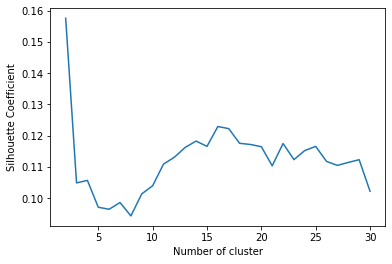

In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX_grp_40)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ufcX_grp_40, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.08586003689940055
For n_clusters=2, The homogeneity_score is 0.0033409125626836468
For n_clusters=2, The log_likelihood score is -1.4645640695981479
For n_clusters=3, The Silhouette Coefficient is 0.09977080014859674
For n_clusters=3, The homogeneity_score is 0.004050560074094389
For n_clusters=3, The log_likelihood score is -0.462106129708029
For n_clusters=4, The Silhouette Coefficient is 0.09411057919662721
For n_clusters=4, The homogeneity_score is 0.006412648189075376
For n_clusters=4, The log_likelihood score is 0.6702615792365747
For n_clusters=5, The Silhouette Coefficient is 0.08649689159976119
For n_clusters=5, The homogeneity_score is 0.0063712043512098625
For n_clusters=5, The log_likelihood score is 1.6353810470617431
For n_clusters=6, The Silhouette Coefficient is 0.08755991088672388
For n_clusters=6, The homogeneity_score is 0.006204222401717492
For n_clusters=6, The log_likelihood score is 2.4362041397192966
For n_cluste

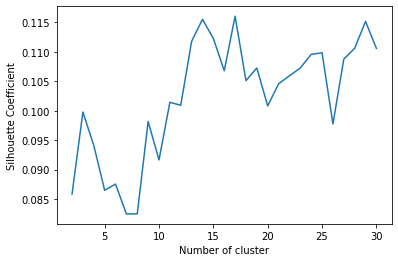

In [72]:
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(ufcX_grp_40)
    label = gmm.predict(ufcX_grp_40)
    sil_coeff = silhouette_score(ufcX_grp_40, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(ufcX_grp_40)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# WINE DATASET

In [63]:
dims_wine = list(range(1,14,1))

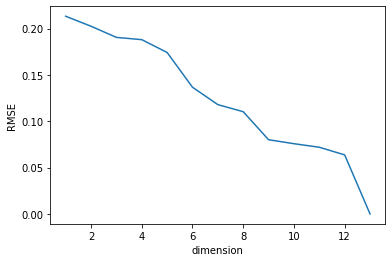

In [64]:
rc_errors_wine = {}
for dim in dims_wine:
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(wineX_df.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(wineX_df.values, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.show()

In [73]:
comp = 9
grp = GaussianRandomProjection(n_components=comp, random_state=44)
grp_result = grp.fit_transform(wineX_df.values)
for i in range(comp):
    field_name = "grp-"+str(i)
    wineX_df[field_name] = grp_result[:,i]
    wine_dataset[field_name] = grp_result[:,i]
wineX_grp_9 = grp_result

In [66]:
rndperm = np.random.permutation(wine_dataset.shape[0])


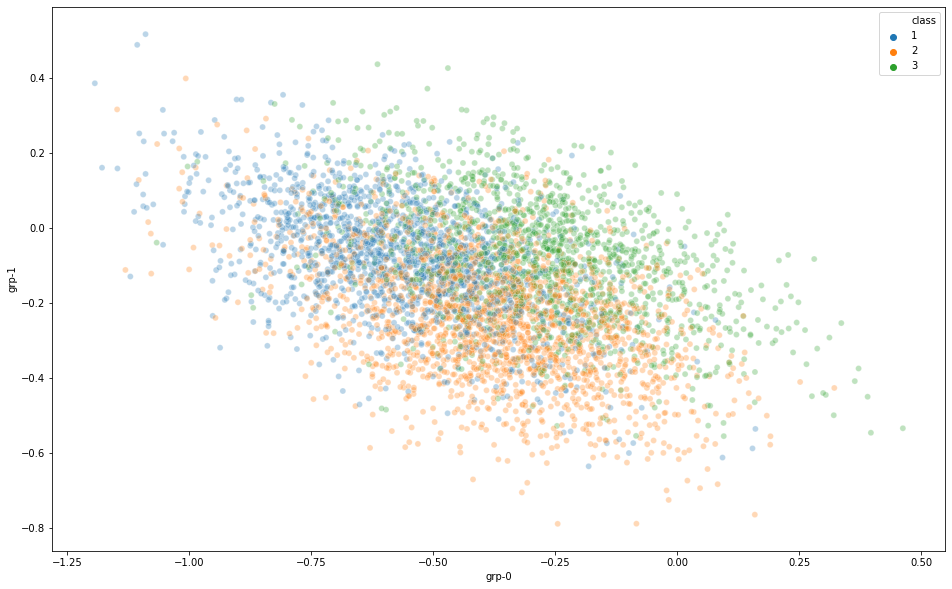

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="grp-0", y="grp-1",
    hue="class",
    palette=sns.color_palette("tab10", 3),
    data=wine_dataset,
    legend="full",
    alpha=0.3
)

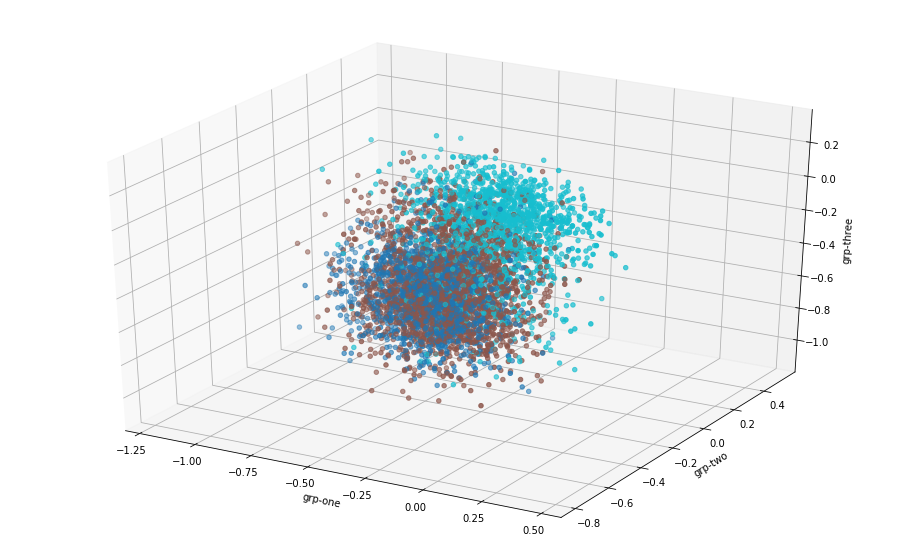

In [68]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=wine_dataset.loc[rndperm,:]["grp-0"], 
    ys=wine_dataset.loc[rndperm,:]["grp-1"], 
    zs=wine_dataset.loc[rndperm,:]["grp-2"], 
    c=wine_dataset.loc[rndperm,:]["class"], 
    cmap='tab10'
)
ax.set_xlabel('grp-one')
ax.set_ylabel('grp-two')
ax.set_zlabel('grp-three')
plt.show()

## Wine Clustering on ICA

For n_clusters=2, The Silhouette Coefficient is 0.28722754816246643
For n_clusters=2, The homogeneity_score is 0.24850199254159513
For n_clusters=3, The Silhouette Coefficient is 0.24351246430429552
For n_clusters=3, The homogeneity_score is 0.3391738147699275
For n_clusters=4, The Silhouette Coefficient is 0.2037649838036307
For n_clusters=4, The homogeneity_score is 0.35040057048847423
For n_clusters=5, The Silhouette Coefficient is 0.1828601208772538
For n_clusters=5, The homogeneity_score is 0.40829901208852365
For n_clusters=6, The Silhouette Coefficient is 0.1640620640326337
For n_clusters=6, The homogeneity_score is 0.41526283288639987
For n_clusters=7, The Silhouette Coefficient is 0.1641144815071051
For n_clusters=7, The homogeneity_score is 0.43703005981645
For n_clusters=8, The Silhouette Coefficient is 0.15108926258170277
For n_clusters=8, The homogeneity_score is 0.44829655744574093
For n_clusters=9, The Silhouette Coefficient is 0.1510595072954485
For n_clusters=9, The ho

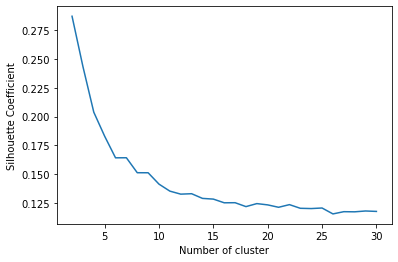

In [74]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh_wine = {}
homog_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX_grp_9)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX_grp_9, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.2547925530550032
For n_clusters=2, The homogeneity_score is 0.2567540529193886
For n_clusters=2, The log_likelihood score is 0.4536496613176403
For n_clusters=3, The Silhouette Coefficient is 0.16631728135204663
For n_clusters=3, The homogeneity_score is 0.39612849882239476
For n_clusters=3, The log_likelihood score is 0.581315881237314
For n_clusters=4, The Silhouette Coefficient is 0.07508030222224535
For n_clusters=4, The homogeneity_score is 0.3660693847570919
For n_clusters=4, The log_likelihood score is 0.6821328748893122
For n_clusters=5, The Silhouette Coefficient is 0.0761799925296418
For n_clusters=5, The homogeneity_score is 0.44280409000730064
For n_clusters=5, The log_likelihood score is 0.753830292084135
For n_clusters=6, The Silhouette Coefficient is 0.057838380165070716
For n_clusters=6, The homogeneity_score is 0.4910519006686404
For n_clusters=6, The log_likelihood score is 0.7901603726071879
For n_clusters=7, The Silh

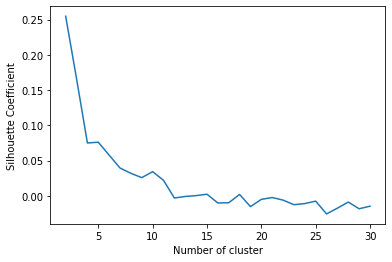

In [75]:
from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(wineX_grp_9)
    label = gmm.predict(wineX_grp_9)
    sil_coeff = silhouette_score(wineX_grp_9, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(wineX_grp_9)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Neural Network on Randomized Projections

In [76]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(wineX_grp_9, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [77]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(wineX_grp_9)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.862
              precision    recall  f1-score   support

           1       0.86      0.90      0.88      1577
           2       0.86      0.83      0.85      2013
           3       0.87      0.87      0.87      1410

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, wineX_grp_9, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.84000462, 0.84202064, 0.8638037 , 0.84763087, 0.86794017,
        0.84161428, 0.86402869, 0.86980681, 0.86063048, 0.86404013]),
 0.8561520404468569)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wineX_grp_9, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [81]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [82]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [83]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

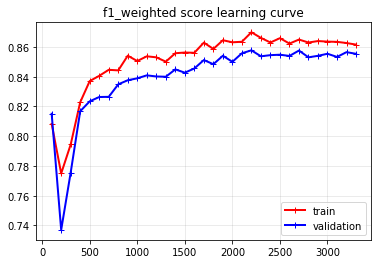

In [84]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [88]:
# start with the best net from Assignment 1
best_net  = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   35.5s finished


[0.86640859 0.86683104 0.86781169] [0.85852794 0.85408349 0.85712661] [(60, 60), (80, 80), (100, 100)]


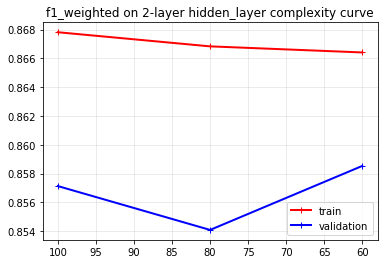

In [89]:
from sklearn.model_selection import validation_curve
params = [60, 80, 100]
param_range = [(60,60), (80,80), (100,100)]

train_scores, test_scores = validation_curve(
    best_net, X_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=5, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), params, 
                title='f1_weighted on 2-layer hidden_layer complexity curve', inverse_x=True)

In [90]:
# start with the best net from Assignment 1
best_net_RP = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

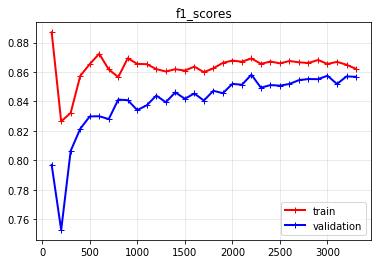

In [91]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net_RP, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

In [92]:
from sklearn.metrics import confusion_matrix
best_net_RP.fit(X_train, y_train)
test_predictions = best_net_RP.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.86882   0.87716   0.87297       521
           2    0.82840   0.84337   0.83582       664
           3    0.86607   0.83441   0.84995       465

    accuracy                        0.85152      1650
   macro avg    0.85443   0.85165   0.85291      1650
weighted avg    0.85178   0.85152   0.85153      1650

[[457  51  13]
 [ 57 560  47]
 [ 12  65 388]]
